**cARscan Coding Assignment for Computer Vision**<br>
By Vaishnavi Desale


---

In [1]:
!pip install pixellib

In [2]:
# Import necessary libraries
import os
import PIL
import cv2
import time
import glob
import math
import pixellib
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pixellib.tune_bg import alter_bg
from pixellib.instance import instance_segmentation

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Code to load images. 
image_list = []
for filename in glob.glob('gdrive/MyDrive/Colab Notebooks/data/input/cars_train/*.jpg'): 
    im=Image.open(filename)
    image_list.append(im)

print("Total car images for training:", len(image_list))

Total car images for training: 100


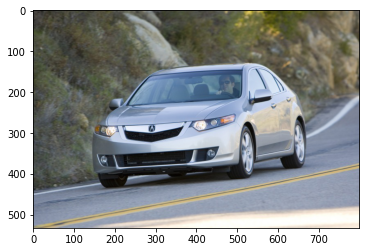

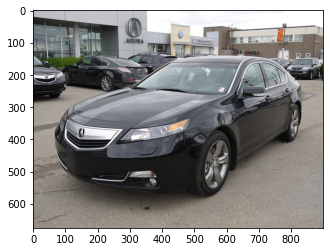

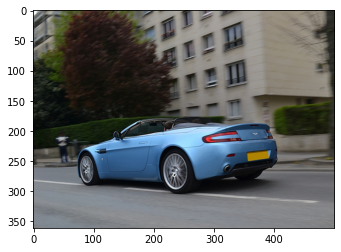

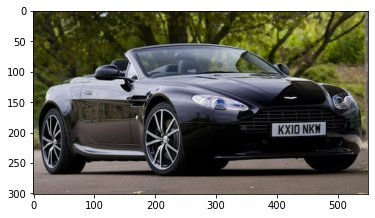

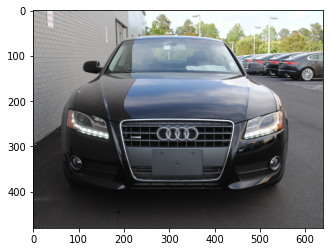

In [5]:
# Displaying loaded images
for i in range(5):
    plt.figure()
    plt.imshow(image_list[i])

In [6]:
# Code to detect target classes
seg = instance_segmentation()
seg.load_model("gdrive/MyDrive/Colab Notebooks/code/mask_rcnn_coco.h5")

Instructions for updating:
Use fn_output_signature instead


In [7]:
# Applying algorithm to train and test data 
change_bg = alter_bg()
change_bg.load_pascalvoc_model("gdrive/MyDrive/Colab Notebooks/code/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5") 

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Car detection, background removal and replacement for cars_train data
tmp = 0
for i in range(1,101):
  target_classes = seg.select_target_classes(car=True)
  t1 = time.perf_counter()
  print("\nWorking on train image :",i)
  if i<10:
    seg.segmentImage("gdrive/MyDrive/Colab Notebooks/data/input/cars_train/0000"+str(i)+".jpg", segment_target_classes= target_classes, show_bboxes=True,  output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_train_images/car_detection/car_detect"+str(i)+".jpg")
    change_bg.color_bg("gdrive/MyDrive/Colab Notebooks/data/input/cars_train/0000"+str(i)+".jpg", colors = (255,255,255), output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_train_images/car_bg_removal/car_img"+str(i)+".jpg")
  elif i<100:
    seg.segmentImage("gdrive/MyDrive/Colab Notebooks/data/input/cars_train/000"+str(i)+".jpg", segment_target_classes= target_classes, show_bboxes=True,  output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_train_images/car_detection/car_detect"+str(i)+".jpg")
    change_bg.color_bg("gdrive/MyDrive/Colab Notebooks/data/input/cars_train/000"+str(i)+".jpg", colors = (255,255,255), output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_train_images/car_bg_removal/car_img"+str(i)+".jpg")
  else:
    seg.segmentImage("gdrive/MyDrive/Colab Notebooks/data/input/cars_train/00"+str(i)+".jpg", segment_target_classes= target_classes, show_bboxes=True,  output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_train_images/car_detection/car_detect"+str(i)+".jpg")
    change_bg.color_bg("gdrive/MyDrive/Colab Notebooks/data/input/cars_train/00"+str(i)+".jpg", colors = (255,255,255), output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_train_images/car_bg_removal/car_img"+str(i)+".jpg")
  
  t2 = time.perf_counter()
  tmp = tmp + (t2-t1) 

avg = tmp/100
print("\n\nAverage time for output train images is: ", math.ceil(avg), "secs")
print("\n\nTotal Time taken:", math.ceil(tmp/60), "mins")


Working on train image : 1


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Processed image saved successfully in your current working directory.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2458: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Working on train image : 2
Processed image saved successfully in your current working directory.

Working on train image : 3
Processed image saved successfully in your current working directory.

Working on train image : 4
Processed image saved successfully in your current working directory.

Working on train image : 5
Processed image saved successfully in your current working directory.

Working on train image : 6
Processed image saved successfully in your current working directory.

Working on train image : 7
Processed image saved successfully in your current working directory.

Working on train image : 8
Processed image saved successfully in your current working directory.

Working on train image : 9
Processed image saved successfully in your current working directory.

Working on train image : 10
Processed image saved successfully in your current working directory.

Working on train image : 11
Processed image saved successfully in your current working directory.

Working on train 

In [9]:
# Car detection, background removal and replacement for cars_test data
tmp = 0
for i in range(1,11):
  target_classes = seg.select_target_classes(car=True)
  t1 = time.perf_counter()
  print("\nWorking on test image :",i)
  seg.segmentImage("gdrive/MyDrive/Colab Notebooks/data/input/cars_test/view"+str(i)+".jpeg", segment_target_classes= target_classes, show_bboxes=True,  output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_test_images/car_detection/car_detect"+str(i)+".jpg")
  change_bg.color_bg("gdrive/MyDrive/Colab Notebooks/data/input/cars_test/view"+str(i)+".jpeg", colors = (255,255,255), output_image_name="gdrive/MyDrive/Colab Notebooks/data/output/output_test_images/car_bg_removal/car_img"+str(i)+".jpg")
  t2 = time.perf_counter()
  print("Time taken to run:", math.ceil(t2-t1), "secs")
  tmp = tmp + (t2-t1)

avg = tmp/10
print("\n\nAverage time for output test images is: ", math.ceil(avg), "secs")
print("\n\nTotal time taken:", math.ceil(tmp/60), "mins")


Working on test image : 1
Processed image saved successfully in your current working directory.
Time taken to run: 19 secs

Working on test image : 2
Processed image saved successfully in your current working directory.
Time taken to run: 19 secs

Working on test image : 3
Processed image saved successfully in your current working directory.
Time taken to run: 20 secs

Working on test image : 4
Processed image saved successfully in your current working directory.
Time taken to run: 19 secs

Working on test image : 5
Processed image saved successfully in your current working directory.
Time taken to run: 20 secs

Working on test image : 6
Processed image saved successfully in your current working directory.
Time taken to run: 20 secs

Working on test image : 7
Processed image saved successfully in your current working directory.
Time taken to run: 20 secs

Working on test image : 8
Processed image saved successfully in your current working directory.
Time taken to run: 20 secs

Working

---